In [2]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df.tail()
# Standard missing values
df['ST_NUM']
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [5]:

# Non Standard missing values
df['NUM_BEDROOMS']
# df['NUM_BEDROOMS'].isnull()

missing_values = ['n/a', 'na', '--']
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)
df
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [6]:
# Unexpected missing values
df['OWN_OCCUPIED']
# count = 0
# for row in df['OWN_OCCUPIED']:
#     try:
#         int(row)
#         df.loc[count, 'OWN_OCCUPIED']=np.nan
#     except ValueError:
#         pass
#     count+=1
# df.head(9)
# df
for idx, row in enumerate(df['OWN_OCCUPIED']):
    if row is not 'Y' and row is not 'N':
        df.loc[idx, 'OWN_OCCUPIED']=np.nan
df.head(9)

# Summarizing missing values
df.isnull().sum()
df.isnull().values.any()
df.isnull().sum().sum()
# df.loc[2]
# df.loc[2, 'ST_NUM'] = 0
# df.loc[2]
# median=df['NUM_BEDROOMS'].median()
# # median
# # df['NUM_BEDROOMS'].fillna(median, inplace=True)
# df

12

<AxesSubplot:xlabel='Year'>

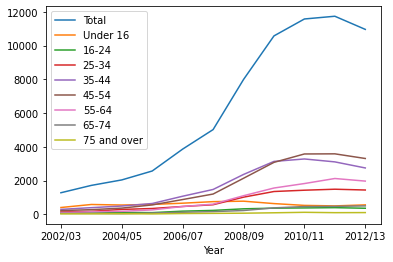

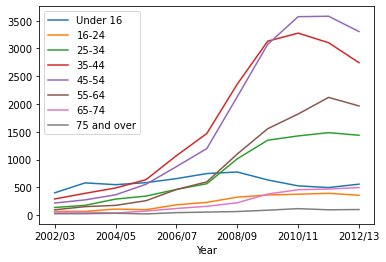

In [16]:
# Analyzing Obesity in England
%matplotlib inline
# !python -m pip install xlrd
# data = pd.read_excel('./obes.xls')
data = pd.ExcelFile('./obes.xls')
data.sheet_names
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age.head()
# rename the first header to year and get rid of any empty rows
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
data_age

data_age.dropna(inplace=True)
data_age
data_age.set_index('Year', inplace=True)
data_age
data_age.plot()

data_age_minus_total = data_age.drop('Total', axis=1)
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

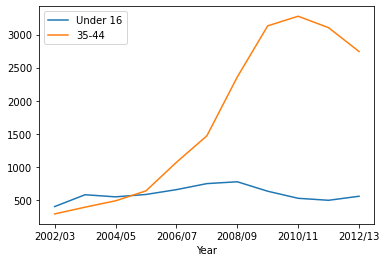

In [20]:
data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label='35-44', legend=True)

In [32]:
# Time Series
# Basic time series manipulation
from datetime import datetime
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng
df = pd.DataFrame(date_rng, columns=['date'])
df

df['data'] = np.random.randint(0,100, size=(len(date_rng)))
# help(np.random.randint)
df.head()

df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

string_date_rng = [str(x) for x in date_rng]

timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]
timestamp_date_rng_2
# Dataframe?
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 152.0 bytes


In [64]:
# df[df.index.day == 2]
df.loc['2020-01-03']
df.loc['2020-01-04': '2020-01-06']
# df.head()
# df.resample('D').mean()

df['rolling_sum'] = df.rolling(3).sum()
# df['rolling_mean'] = df.rolling(2).mean()
# df.drop('rolling_mean', axis=1, inplace=True)
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,67,NaN
2020-01-01 01:00:00,58,NaN
2020-01-01 02:00:00,65,190.0
2020-01-01 03:00:00,33,156.0
2020-01-01 04:00:00,58,156.0


In [72]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,67,NaN,190.0
2020-01-01 01:00:00,58,NaN,190.0
2020-01-01 02:00:00,65,190.0,190.0
2020-01-01 03:00:00,33,156.0,156.0
2020-01-01 04:00:00,58,156.0,156.0


In [115]:
# Time Series on Dataset
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', parse_dates=True)
opsd_daily.shape
opsd_daily.head()
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.set_index('Date', inplace=True)
opsd_daily.head()
opsd_daily.index

# alternative set index
# pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

# Extract new column from date
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Week'] = opsd_daily.index.weekday
opsd_daily.head()
opsd_daily.loc['2014-01-20' : '2014-01-22']
# opsd_daily.loc['2012-01']
opsd_daily.head()


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Week
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


Text(0, 0.5, 'Daily Consumption (Gwh)')

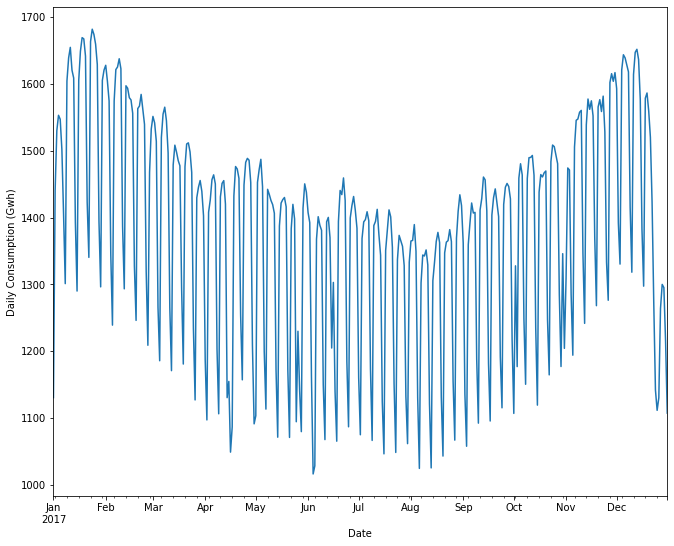

In [108]:
# Visualize
# opsd_daily['Consumption'].plot(linewidth=0.5)

# opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
# opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
# opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (Gwh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

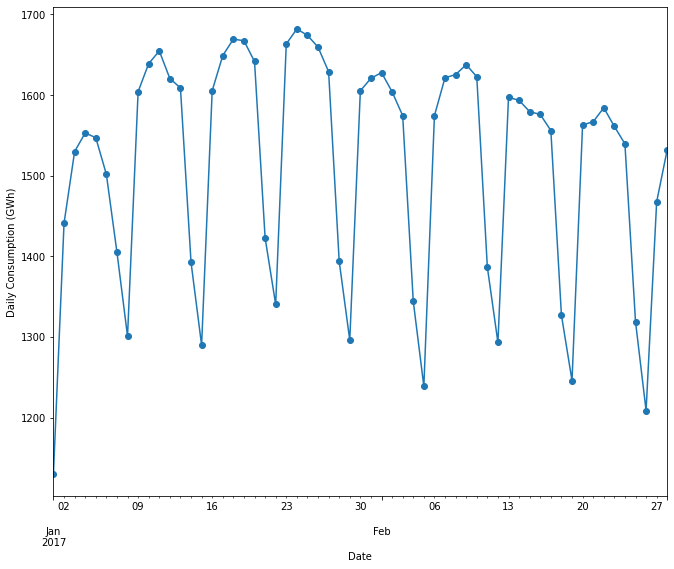

In [109]:
ax = opsd_daily.loc['2017-01': '2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

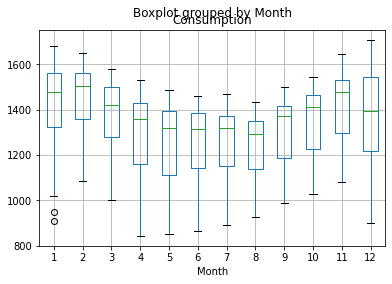

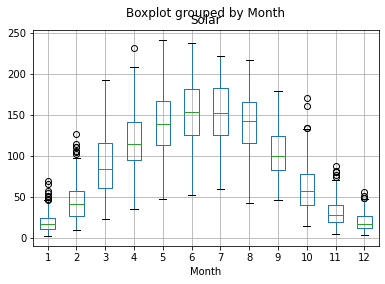

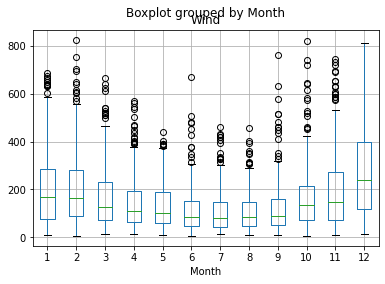

In [117]:
opsd_daily.boxplot(column=['Consumption'], by='Month')
opsd_daily.boxplot(column=['Solar'], by='Month')
opsd_daily.boxplot(column=['Wind'], by='Month')
# help(opsd_daily.boxplot)

In [124]:
# opsd_daily.boxplot(column=['Consumption'], by='Week')
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

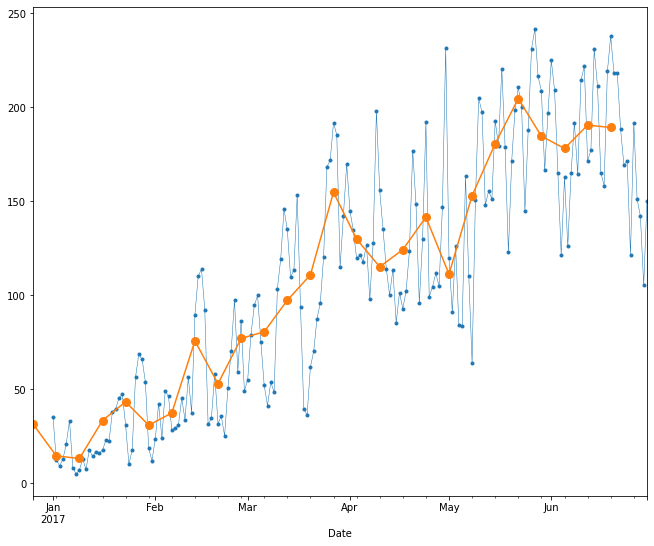

In [128]:
# Rangkaian waktu solar harian dan mingguan dalam satu periode 6 bulan
start, end = '2017-01', '2017-06'
opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

In [151]:
from datetime import datetime, timedelta

now = datetime.now()
now

now.year
now.month

delta = datetime.now() - datetime(2020, 6, 22)
delta.days

delta.seconds

datetime(2011, 1, 7) + timedelta(7)

stamp = datetime(2011, 1, 3)
str(stamp)

stamp.strftime('%Y-%m-%d')
# datetime.strptime('2011-01-03', '%Y-%m-%d')

# from IPython.display import Image
# Image(url= "./datetime.png")

'2011-01-03'

In [157]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts['20110110']

dates2 = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates2)
dup_ts.index.is_unique

False